# Analytical solutions


(-0.5, 1.01)

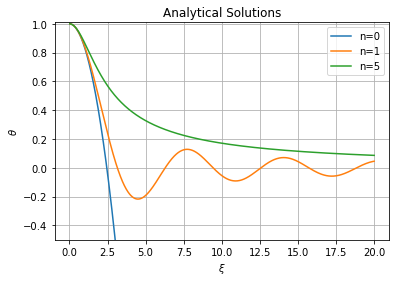

In [172]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
def n0(xi):
    d=1-xi**2/6
    return d


def n1(xi):
    g=(np.sin(xi))/xi
    return g

def n5(xi):
    h=(1+(xi**2)/3)**(-0.5)
    return  h
t=np.linspace(0.02,20,1000)
yy0=n0(t)

y1=n1(t)
y5=n5(t)
plt.plot(t,yy0,label='n=0')
plt.plot(t,y1,label='n=1')
plt.plot(t,y5,label='n=5')
plt.legend()
plt.xlabel("$\\xi$")
plt.ylabel("$\\theta$")
plt.title('Analytical Solutions')
plt.grid(True)
plt.ylim(-0.5,1.01)

# Numerical Solutions 

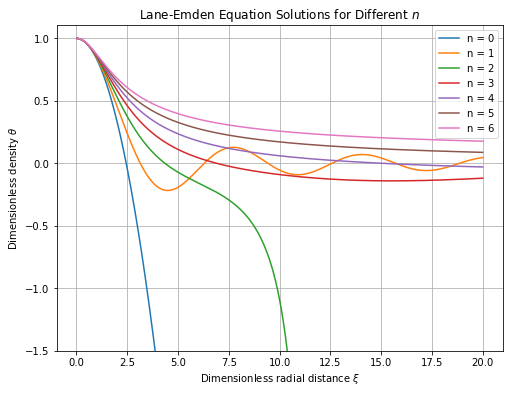

In [169]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def lane_emden(t, y, n):
    theta, phi = y
    dydt = [phi, -2/t*phi - theta**n]
    return dydt

# Initial conditions
theta0 = 1
phi0 = 0
y0 = [theta0, phi0]

# Values of xi to integrate to
xi_max = 20

# Plot solutions for n = 0, 1, 5
n_values = [0, 1, 2,3, 4 , 5,6]
xi = np.linspace(20 / 1000, xi_max, 1000)
theta_values = [[] for n in n_values]

plt.figure(figsize=(8, 6))
for n in n_values:
    sol = solve_ivp(lane_emden, [0.01, xi_max], y0, args=(n,), dense_output=True)
    theta, phi = sol.sol(xi)
    theta_values[n] = theta
    plt.plot(xi, theta, label=f"n = {n}")

plt.xlabel("Dimensionless radial distance $\\xi$")
plt.ylabel("Dimensionless density $\\theta$")
plt.title("Lane-Emden Equation Solutions for Different $n$")
plt.legend()
plt.grid(True)
plt.ylim(-1.5,1.11)
plt.show()
theta_n0 = theta_values[n_values.index(0)]
theta_n1 = theta_values[n_values.index(1)]
theta_n5 = theta_values[n_values.index(5)]
theta_n2 = theta_values[n_values.index(3)]
theta_n3 = theta_values[n_values.index(3)]
theta_n4 = theta_values[n_values.index(4)]
theta_n6 = theta_values[n_values.index(6)]




# FINDING THE ZERO POINT ie.dimensionless radii

In [152]:
# Find the index of the first non-positive value
non_positive_indices0 = np.nonzero(theta_n0 <= 0)[0]
non0=non_positive_indices0[0]
xi0=xi[non0]
#
non_positive_indices1 = np.nonzero(theta_n1 <= 0)[0]
non1=non_positive_indices1[0]
g=xi1=xi[non1]
#
non_positive_indices2 = np.nonzero(theta_n2 <= 0)[0]
non2=non_positive_indices2[0]
xi2=xi[non2]
#
non_positive_indices3 = np.nonzero(theta_n3 <= 0)[0]
non3=non_positive_indices3[0]
xi3=xi[non3]
#
non_positive_indices4 = np.nonzero(theta_n4 <= 0)[0]
non4=non_positive_indices4[0]
xi4=xi[non4]

radius=[xi0, xi1, xi2,xi3,xi4]
for i in radius:
    print("The approximate xi radius for n=",radius.index(i),i)

The approximate xi radius for n= 0 2.46
The approximate xi radius for n= 1 3.16
The approximate xi radius for n= 2 6.92
The approximate xi radius for n= 2 6.92
The approximate xi radius for n= 4 15.120000000000001


In [153]:
radius

[2.46, 3.16, 6.92, 6.92, 15.120000000000001]

In [154]:
non_positive_indices1 = np.nonzero(theta_n2 <= 0)[0]
non1=non_positive_indices1[0]
xi1=xi[non1]
xi1

6.92

(0.0, 5.0)

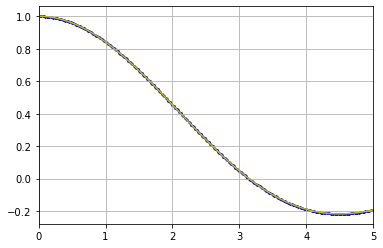

In [173]:
plt.plot(xi,theta_n1,'y')
plt.scatter(xi,y1,s=3 ,c='blue')
#plt.plot(t,y,'r')
plt.grid(True)
#i mean n=2 analysis
plt.xlim(0,5)

In [156]:
# Define your list of values
values = ['apple', 'banana', 'cherry']

# Print the text description
print("List of Fruits:")

# Iterate through the list and print each value
for value in values:
    print(value,values.index(value))


List of Fruits:
apple 0
banana 1
cherry 2


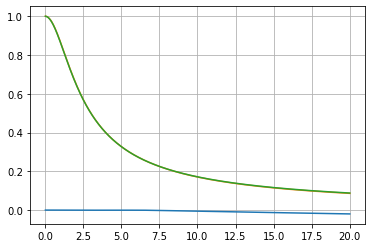

In [174]:
plt.plot(xi,R5,label='n=1')
plt.plot(xi,a5,label='n=1')
plt.plot(xi,b5,label='n=1')
plt.grid(True)

# ERROR/ACCURACY


In [175]:
sum(theta_n1/y1)/1000 #n=0

0.9989356201591115

In [176]:
sum(y1/theta_n1)/1000

1.001348063708312

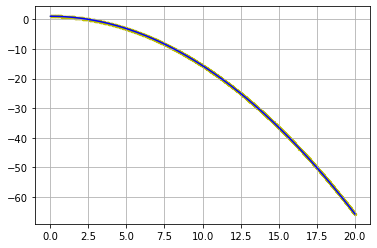

In [177]:
plt.plot(xi,yy0,c='b')
plt.scatter(xi,theta_n0,s=5,c='y')
plt.grid(True)
#plt.plot(t,y,'r')

In [178]:
sum(theta_n0/yy0)/1000 #n=1

1.0000013922434792

In [179]:
sum(yy0/theta_n0)/1000

0.9999987001789292

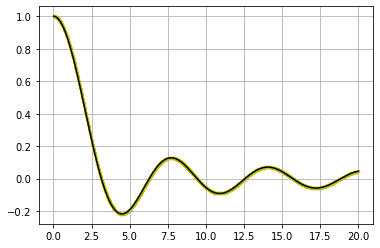

In [180]:
plt.plot(xi,y1,c='black')
plt.scatter(xi,theta_n1,s=5,c='y')
plt.grid(True)
#plt.plot(t,y,'r')

In [181]:
sum(theta_n5/y5)/1000 # n=5


1.0070611508540503

In [182]:
sum(y5/theta_n5)/1000

0.9930295663950925

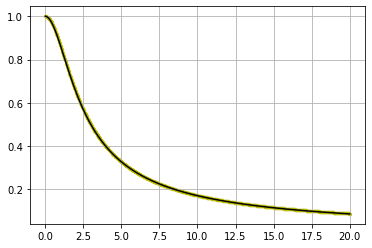

In [183]:
plt.plot(xi,y5,c='black')
plt.scatter(xi,theta_n5,s=5,c='y')
plt.grid(True)
#plt.plot(t,y,'r')

# MSE


In [184]:
a0=yy0=n0(t)

a1=y1
a5=y5=n5(t)
b0=theta_n0 = theta_values[n_values.index(0)]
b1=theta_n1 = theta_values[n_values.index(1)]
b5=theta_n5 = theta_values[n_values.index(5)]

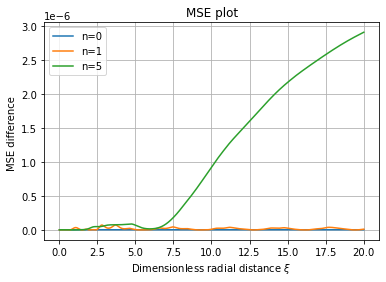

In [204]:
plt.plot(xi,(a0-b0)**2,label='n=0')
plt.plot(xi,(a1-b1)**2,label='n=1')
plt.plot(xi,(a5-b5)**2,label='n=5')
plt.xlabel("Dimensionless radial distance $\\xi$")
plt.ylabel("MSE difference ")
plt.title("MSE plot")
plt.legend()
plt.grid(True)
#plt.xlim(-0.4,11)

 # TRUE ERR0R

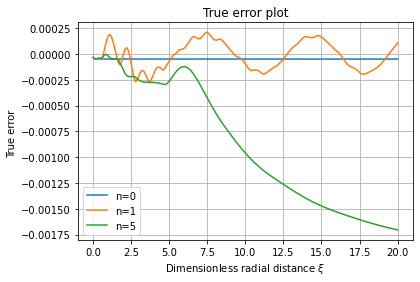

In [187]:
TE0=(a0-b0)
TE1=(a1-b1)
TE5=a5-b5
plt.plot(xi,TE0,label='n=0')
plt.plot(xi,TE1,label='n=1')
plt.plot(xi,TE5,label='n=5')
plt.xlabel("Dimensionless radial distance $\\xi$")
plt.ylabel("True error ")
plt.title("True error plot")
plt.legend()
plt.grid()

# Relative Error

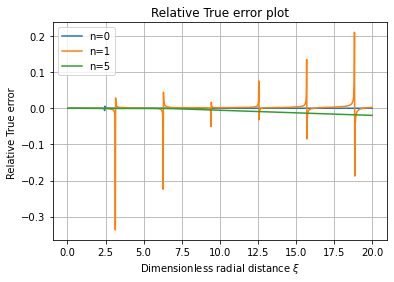

In [188]:
R0=TE0/a0
R1=TE1/a1
R5=TE5/a5
plt.plot(xi,R0,label='n=0')
plt.plot(xi,R1,label='n=1')
plt.plot(xi,R5,label='n=5')
plt.xlabel("Dimensionless radial distance $\\xi$")
plt.ylabel("Relative True error ")
plt.title("Relative True error plot")
plt.legend()
plt.grid()

# Percent Error

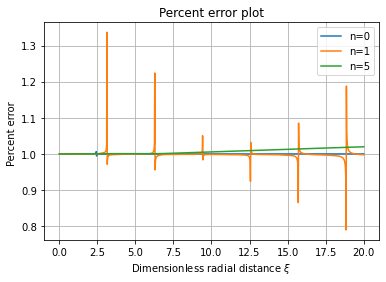

In [189]:
P0=b0/a0
P1=b1/a1
P5=b5/a5
plt.plot(xi,P0,label='n=0')
plt.plot(xi,P1,label='n=1')
plt.plot(xi,P5,label='n=5')
plt.xlabel("Dimensionless radial distance $\\xi$")
plt.ylabel("Percent error ")
plt.title("Percent error plot")
plt.legend()
plt.grid()

# RMSE

In [191]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Calculate RMSE
rmse_value0 = sqrt(mean_squared_error(a0, b0))
rmse_value1 = sqrt(mean_squared_error(a1, b1))
rmse_value5 = sqrt(mean_squared_error(a5, b5))
print(f"RMSE n=0: {rmse_value0:.4f}")
print(f"RMSE n=1: {rmse_value1:.4f}")
print(f"RMSE n=5: {rmse_value5:.4f}")


RMSE n=0: 0.0000
RMSE n=1: 0.0001
RMSE n=5: 0.0011


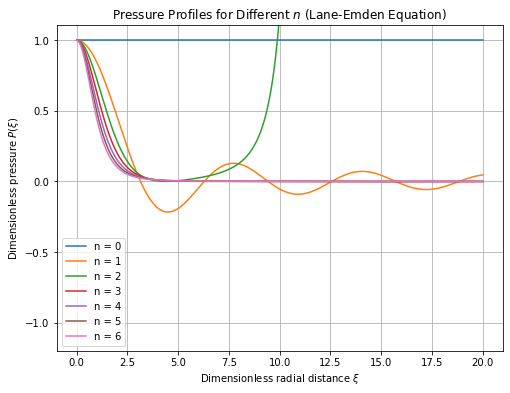

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define the Lane-Emden equation
def lane_emden(t, y, n):
    theta, phi = y
    dydt = [phi, -2/t*phi - theta**n]
    return dydt

# Initial conditions
theta0 = 1
phi0 = 0
y0 = [theta0, phi0]

# Values of xi to integrate to
xi_max = 20

# Plot pressure profiles for n = 0, 1, 2, 3, 4, 5, 6
n_values = [0, 1, 2, 3, 4, 5, 6]
xi = np.linspace(0.01, xi_max, 300)

plt.figure(figsize=(8, 6))
for n in n_values:
    sol = solve_ivp(lane_emden, [0.01, xi_max], y0, args=(n,), dense_output=True)
    theta, phi = sol.sol(xi)
    pressure = theta**n  # Pressure profile

    plt.plot(xi, pressure, label=f"n = {n}")

plt.xlabel("Dimensionless radial distance $\\xi$")
plt.ylabel("Dimensionless pressure $P(\\xi)$")
plt.title("Pressure Profiles for Different $n$ (Lane-Emden Equation)")
plt.legend()
plt.grid(True)
plt.ylim(-1.2,1.11)
plt.show()


# DENSITY


In [192]:
p0=theta_n0**0
p1=theta_n1 
p2=theta_n5**5
p3=theta_n2**2 
p4=theta_n3 **3
p5=theta_n4 **4
p6=theta_n6 **6


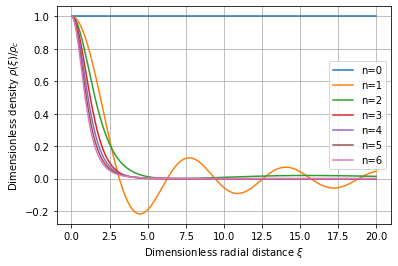

In [193]:
plt.plot(xi,theta_n0**0,label='n=0')
plt.plot(xi,theta_n1**1,label='n=1')
plt.plot(xi,theta_n2**2,label='n=2')
plt.plot(xi,theta_n3**3,label='n=3')
plt.plot(xi,theta_n4**4,label='n=4')
plt.plot(xi,theta_n5**5,label='n=5')
plt.plot(xi,theta_n6**6,label='n=6')
plt.xlabel("Dimensionless radial distance $\\xi$")
plt.ylabel("Dimensionless density $\\rho(\\xi)/\\rho_c$")
plt.legend()
plt.grid(True)

# PRESSURE

In [194]:
#P=p0**(1+1/0)
P1=p1**(1+1/1) 
P2=p2**(1+1/2)
P3=p3**(1+1/3) 
P3=p4**(1+1/4)
P5=p5**(1+1/5)
P6=p6**(1+1/6)


C:\Users\aobak\AppData\Local\Temp/ipykernel_21212/3867844234.py:5: RuntimeWarning: invalid value encountered in power
  P3=p4**(1+1/4)


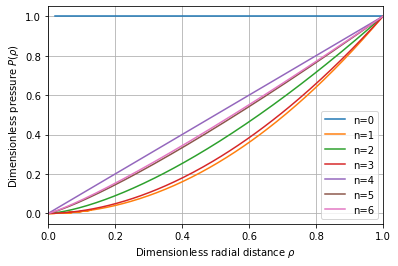

In [195]:
plt.plot(xi,theta_n0**0,label='n=0')

plt.plot(p1,P1,label='n=1')
plt.plot(p2,P2,label='n=2')
plt.plot(p3,P3,label='n=3')
plt.plot(p4,p4,label='n=4')
plt.plot(p5,P5,label='n=5')
plt.plot(p6,P6,label='n=6')
plt.legend()
plt.xlabel("Dimensionless radial distance $\\rho$")
plt.ylabel("Dimensionless pressure $P(\\rho)$")
plt.xlim(0.0,1)
plt.grid(True)

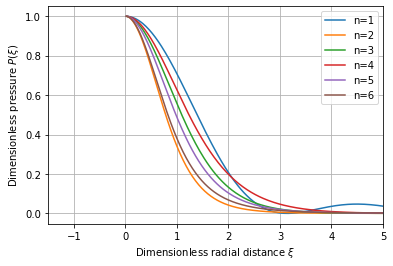

In [196]:
#plt.plot(P,theta_n0**0,label='n=0')
plt.plot(xi,P1,label='n=1')
plt.plot(xi,P2,label='n=2')
plt.plot(xi,P3,label='n=3')
plt.plot(xi,p4,label='n=4')
plt.plot(xi,P5,label='n=5')
plt.plot(xi,P6,label='n=6')
plt.xlabel("Dimensionless radial distance $\\xi$")
plt.ylabel("Dimensionless pressure $P(\\xi)$")
plt.xlim(-1.5,5)
plt.legend()
plt.grid(True)

In [197]:
6**(1/2)

2.449489742783178

C:\Users\aobak\AppData\Local\Temp/ipykernel_21212/2875259925.py:25: RuntimeWarning: invalid value encountered in double_scalars
  v[1] = (y[0]**n) * t**2


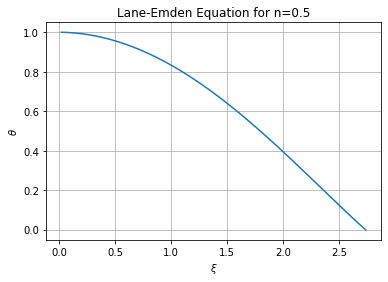

In [198]:
import numpy as np
import matplotlib.pyplot as plt

def runge_kutta(y, t, dt, n):
    # Runge-Kutta 4th Order integrator
    c1 = np.zeros(2)
    c2 = np.zeros(2)
    c3 = np.zeros(2)
    c4 = np.zeros(2)

    c1 = g(y, t, n)
    c2 = y + dt * c1 / 2
    c2 = g(c2, t + dt / 2, n)
    c3 = y + dt * c2 / 2
    c3 = g(c3, t + dt / 2, n)
    c4 = y + dt * c3 / 2
    c4 = g(c4, t + dt / 2, n)

    return y + dt * (c1 + 2 * (c2 + c3) + c4) / 6

def g(y, t, n):
    # Generates the vectors that act as the two 1st order differential equations
    v = np.zeros(2)
    v[0] = -y[1] / t**2
    v[1] = (y[0]**n) * t**2
    return v

def lane_emden_solver(n):
    dt = 20 / 1000  # Maximum value chosen to show roots between n=4 and n=5
    y = np.zeros(2)
    y[0] = 1
    y[1] = 0
    t = np.zeros(1000)
    y1 = np.zeros(1000)

    for i in range(1000):
        t[i] = dt * (i + 1)
        y = runge_kutta(y, t[i], dt, n)
        y1[i] = y[0]

    return t, y1

# Example usage for n=0.5
xi, theta = lane_emden_solver(0.5)
plt.plot(xi, theta)
plt.xlabel(r"$\xi$")
plt.ylabel(r"$\theta$")
plt.title("Lane-Emden Equation for n=0.5")
plt.grid(True)
plt.show()


C:\Users\aobak\AppData\Local\Temp/ipykernel_5080/833580663.py:25: RuntimeWarning: invalid value encountered in double_scalars
  v[1] = (y[0]**n) * t**2
C:\Users\aobak\AppData\Local\Temp/ipykernel_5080/833580663.py:25: RuntimeWarning: overflow encountered in double_scalars
  v[1] = (y[0]**n) * t**2


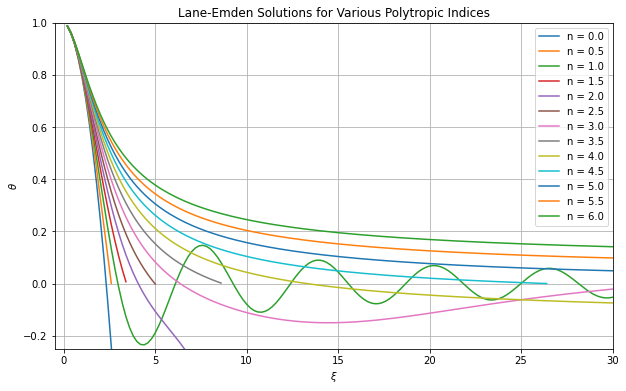

In [36]:
import numpy as np
import matplotlib.pyplot as plt

def runge_kutta(y, t, dt, n):
    # Runge-Kutta 4th Order integrator
    c1 = np.zeros(2)
    c2 = np.zeros(2)
    c3 = np.zeros(2)
    c4 = np.zeros(2)

    c1 = g(y, t, n)
    c2 = y + dt * c1 / 2
    c2 = g(c2, t + dt / 2, n)
    c3 = y + dt * c2 / 2
    c3 = g(c3, t + dt / 2, n)
    c4 = y + dt * c3 / 2
    c4 = g(c4, t + dt / 2, n)

    return y + dt * (c1 + 2 * (c2 + c3) + c4) / 6

def g(y, t, n):
    # Generates the vectors that act as the two 1st order differential equations
    v = np.zeros(2)
    v[0] = -y[1] / t**2
    v[1] = (y[0]**n) * t**2
    return v

def lane_emden_solver(n_values):
    dt = 20 / 100  # Maximum value chosen to show roots between n=4 and n=5
    t = np.zeros(500)
    y_values = []

    for n in n_values:
        y = np.zeros(2)
        y[0] = 1
        y[1] = 0
        y1 = np.zeros(500)

        for i in range(500):
            t[i] = dt * (i + 1)
            y = runge_kutta(y, t[i], dt, n)
            y1[i] = y[0]

        y_values.append(y1)

    return t, y_values

# Example usage for n values [0, 0.5, 1, 1.5, ...]
n_values = np.arange(0, 6.5, 0.5)
xi, theta_values = lane_emden_solver(n_values)

# Plot the solutions
plt.figure(figsize=(10, 6))
for i, n in enumerate(n_values):
    plt.plot(xi, theta_values[i], label=f"n = {n:.1f}")

plt.xlabel(r"$\xi$")
plt.ylabel(r"$\theta$")
plt.title("Lane-Emden Solutions for Various Polytropic Indices")
plt.legend()
plt.ylim(-0.25,1)
plt.grid(True)
plt.xlim(-.5,30)
plt.show()
u1=theta_values[1]
u2=theta_values[3]
u3=theta_values[5]
u4=theta_values[7]
u5=theta_values[9]
u6=theta_values[11]

#
e1=theta_values[0]
e2=theta_values[2]
e3=theta_values[4]
e4=theta_values[6]
e5=theta_values[8]
e6=theta_values[10]
e7=theta_values[12]

array([9.87103187e-01, 9.60032475e-01, 9.23042475e-01, 8.79343529e-01,
       8.31860214e-01, 7.83031326e-01, 7.34692173e-01, 6.88091367e-01,
       6.43987271e-01, 6.02769197e-01, 5.64570115e-01, 5.29357201e-01,
       4.96998317e-01, 4.67307846e-01, 4.40076714e-01, 4.15091162e-01,
       3.92143846e-01, 3.71039919e-01, 3.51599923e-01, 3.33660720e-01,
       3.17075268e-01, 3.01711759e-01, 2.87452440e-01, 2.74192312e-01,
       2.61837824e-01, 2.50305626e-01, 2.39521420e-01, 2.29418911e-01,
       2.19938872e-01, 2.11028314e-01, 2.02639750e-01, 1.94730553e-01,
       1.87262386e-01, 1.80200712e-01, 1.73514356e-01, 1.67175129e-01,
       1.61157491e-01, 1.55438262e-01, 1.49996368e-01, 1.44812612e-01,
       1.39869480e-01, 1.35150963e-01, 1.30642406e-01, 1.26330373e-01,
       1.22202523e-01, 1.18247504e-01, 1.14454860e-01, 1.10814946e-01,
       1.07318851e-01, 1.03958333e-01, 1.00725755e-01, 9.76140369e-02,
       9.46166018e-02, 9.17273351e-02, 8.89405449e-02, 8.62509262e-02,
      

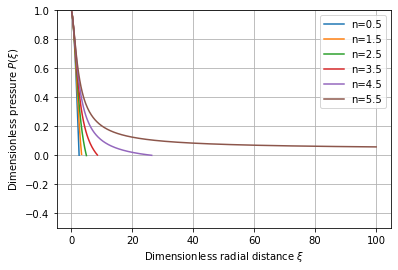

In [37]:
plt.plot(xi,u1,label='n=0.5')
plt.plot(xi,u2,label='n=1.5')
plt.plot(xi,u3,label='n=2.5')
plt.plot(xi,u4,label='n=3.5')
plt.plot(xi,u5,label='n=4.5')
plt.plot(xi,u6,label='n=5.5')
plt.xlabel("Dimensionless radial distance $\\xi$")
plt.ylabel("Dimensionless pressure $P(\\xi)$")
plt.ylim(-.5,1)
plt.legend()
plt.grid(True)
u5

In [39]:
e1[1]

0.9584787037037037

In [45]:
non_positive_indices0 = np.nonzero(u5<= Nan)[0]
non0=non_positive_indices0[0]
xi0=xi[non0]

TypeError: '<=' not supported between instances of 'numpy.ndarray' and 'str'

# Density

C:\Users\aobak\AppData\Local\Temp/ipykernel_5080/2548905287.py:3: RuntimeWarning: invalid value encountered in power
  pp2=u3**2.5


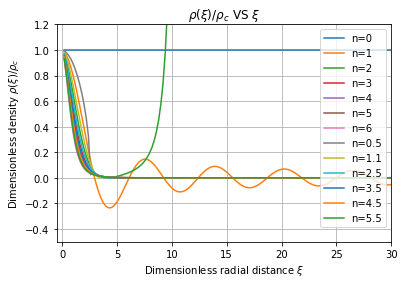

In [40]:


pp0=u1**0.5
pp1=u2**1.5 
pp2=u3**2.5
pp3=u4**3.5 
pp4=u5**4.5
pp5=u6**5.5
p0=e1**0
p1=e2 
p2=e3**2
p3=e4**3 
p4=e5 **4
p5=e6**5
p6=e7**6
plt.plot(xi,p0,label='n=0')
plt.plot(xi,p1,label='n=1')
plt.plot(xi,p2,label='n=2')
plt.plot(xi,p3,label='n=3')
plt.plot(xi,p4,label='n=4')
plt.plot(xi,p5,label='n=5')
plt.plot(xi,p6,label='n=6')
plt.plot(xi,pp0,label='n=0.5')
plt.plot(xi,pp1,label='n=1.1')
plt.plot(xi,pp2,label='n=2.5')
plt.plot(xi,pp3,label='n=3.5')
plt.plot(xi,pp4,label='n=4.5')
plt.plot(xi,pp5,label='n=5.5')
plt.ylim(-.5,1.2)
plt.xlim(-.5,30)
#plt.xlim(.5,2.5)
plt.xlabel("Dimensionless radial distance $\\xi$")
plt.ylabel("Dimensionless density $\\rho(\\xi)/\\rho_c$")
plt.title("$\\rho(\\xi)/\\rho_c$ VS $\\xi$ ")
plt.legend()
plt.grid(True)
plt.show()

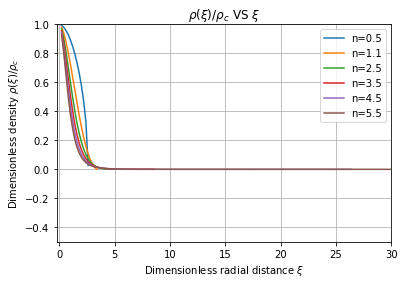

In [41]:
plt.plot(xi,pp0,label='n=0.5')
plt.plot(xi,pp1,label='n=1.1')
plt.plot(xi,pp2,label='n=2.5')
plt.plot(xi,pp3,label='n=3.5')
plt.plot(xi,pp4,label='n=4.5')
plt.plot(xi,pp5,label='n=5.5')
plt.ylim(-.5,1)
#plt.xlim(.5,2.5)
plt.xlabel("Dimensionless radial distance $\\xi$")
plt.ylabel("Dimensionless density $\\rho(\\xi)/\\rho_c$")
plt.title("$\\rho(\\xi)/\\rho_c$ VS $\\xi$ ")
plt.legend()
plt.xlim(-.25,30)
plt.grid(True)

# PRESSURE 

C:\Users\aobak\AppData\Local\Temp/ipykernel_5080/1836038227.py:2: RuntimeWarning: overflow encountered in power
  P2=p2**(1+1/2)
C:\Users\aobak\AppData\Local\Temp/ipykernel_5080/1836038227.py:3: RuntimeWarning: invalid value encountered in power
  P3=p3**(1+1/3)
C:\Users\aobak\AppData\Local\Temp/ipykernel_5080/1836038227.py:9: RuntimeWarning: invalid value encountered in power
  PP1=p1**(1+1/1.5)
C:\Users\aobak\AppData\Local\Temp/ipykernel_5080/1836038227.py:10: RuntimeWarning: overflow encountered in power
  PP2=p2**(1+1/2.5)
C:\Users\aobak\AppData\Local\Temp/ipykernel_5080/1836038227.py:11: RuntimeWarning: invalid value encountered in power
  PP3=p3**(1+1/3.5)


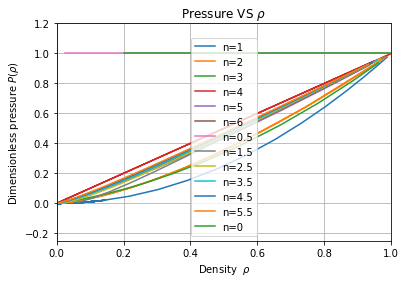

In [32]:
P1=p1**(1+1/1) 
P2=p2**(1+1/2)
P3=p3**(1+1/3) 
P3=p4**(1+1/4)
P5=p5**(1+1/5)
P6=p6**(1+1/6)

PP0=p0**(1+1/0.5) 
PP1=p1**(1+1/1.5) 
PP2=p2**(1+1/2.5)
PP3=p3**(1+1/3.5) 
PP4=p4**(1+1/4.5)
PP5=p5**(1+1/5.5)

plt.plot(p1,P1,label='n=1')
plt.plot(p2,P2,label='n=2')
plt.plot(p3,P3,label='n=3')
plt.plot(p4,p4,label='n=4')
plt.plot(p5,P5,label='n=5')
plt.plot(p6,P6,label='n=6')

plt.plot(pp0,PP0,label='n=0.5')
plt.plot(pp1,PP1,label='n=1.5')
plt.plot(pp2,PP2,label='n=2.5')
plt.plot(pp3,PP3,label='n=3.5')
plt.plot(pp4,PP4,label='n=4.5')
plt.plot(pp5,PP5,label='n=5.5')
plt.plot(xi,p0,label='n=0')

plt.title("Pressure VS $\\rho$ ")
plt.xlabel("Density  $\\rho$")
plt.ylabel("Dimensionless pressure $P(\\rho)$")
plt.xlim(-0.25,1)
plt.ylim(-0.25,1.2)
plt.grid(True)
plt.legend()

In [ ]:
non_positive_indices0 = np.nonzero(theta_n0 <= 0)[0]
non0=non_positive_indices0[0]
xi0=xi[non0]
#